In [1]:
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from src.model_training import evaluate_best_model, get_best_threshold, train_model, tune_threshold
from src.utils import serialize_data

In [15]:
logreg_param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': np.logspace(-4, 4, 20),
    'solver': ['lbfgs', 'newton-cg', 'saga'],
    'max_iter' : [100, 1000],
}

random_forest_param_grid = {
    'max_depth': [10, 20, None],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2],
    'min_samples_split': [2, 5],
}

In [3]:
from src.utils import deserialize_data

X_train = deserialize_data("../data/processed/X_train_ros.pkl")
y_train = deserialize_data("../data/processed/y_train_ros.pkl")

X_valid = deserialize_data("../data/processed/X_valid_prep.pkl")
y_valid = deserialize_data("../data/interim/y_valid.pkl")

X_test = deserialize_data("../data/processed/X_test_prep.pkl")
y_test = deserialize_data("../data/interim/y_test.pkl")

In [4]:
logreg_model = LogisticRegression(n_jobs=-1)
random_forest_model = RandomForestClassifier(n_jobs=-1)

In [5]:
logreg_base = train_model(logreg_model, logreg_param_grid, X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/Users/rudi/Documents/projects/ml-process/.venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/rudi/Documents/projects/ml-process/.venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/rudi/Documents/projects/ml-process/.venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/rudi/Documents/projects/ml-process/.venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/rudi/Documents/projects/ml-process/.venv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
150 fits failed o

In [6]:
random_forest_base = train_model(random_forest_model, random_forest_param_grid, X_train, y_train)

/Users/rudi/Documents/projects/ml-process/.venv/lib/python3.9/site-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 24 is smaller than n_iter=50. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 24 candidates, totalling 120 fits


/Users/rudi/Documents/projects/ml-process/.venv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
60 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
14 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/rudi/Documents/projects/ml-process/.venv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/rudi/Documents/projects/ml-process/.venv/lib/python3.9/site-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/Users/rudi/Documents/projects/ml-process/.venv/lib/python3.9/site-packages/sk

In [7]:
serialize_data(logreg_base, "../models/logreg_base.pkl")
serialize_data(random_forest_base, "../models/random_forest_base.pkl")

In [8]:
logreg_estimator = logreg_base.best_estimator_
random_forest_estimator = random_forest_base.best_estimator_

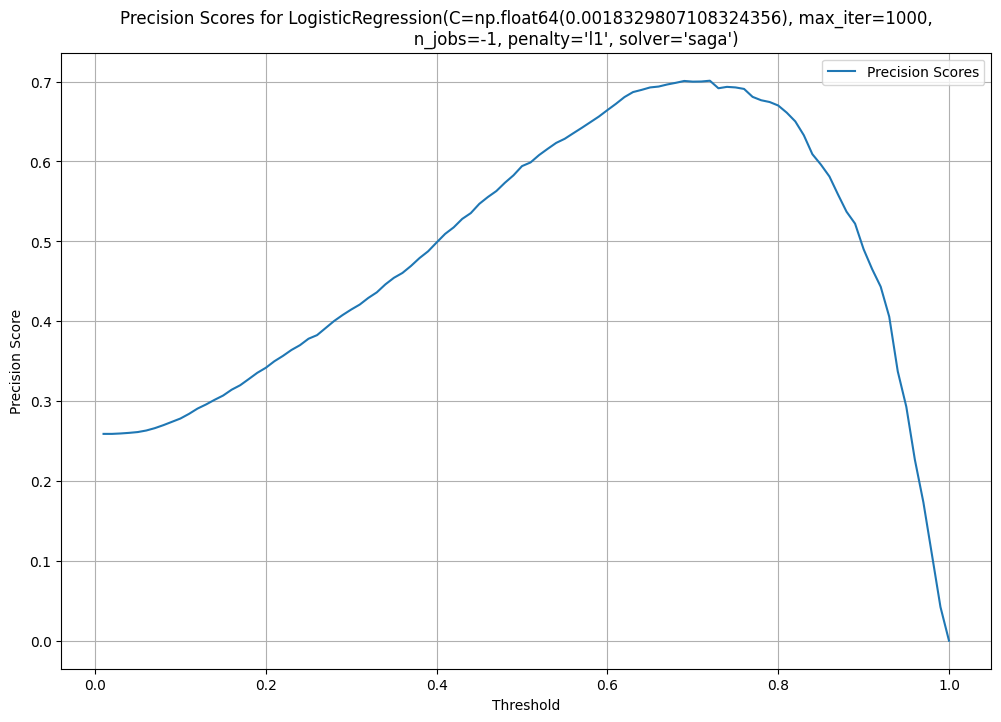

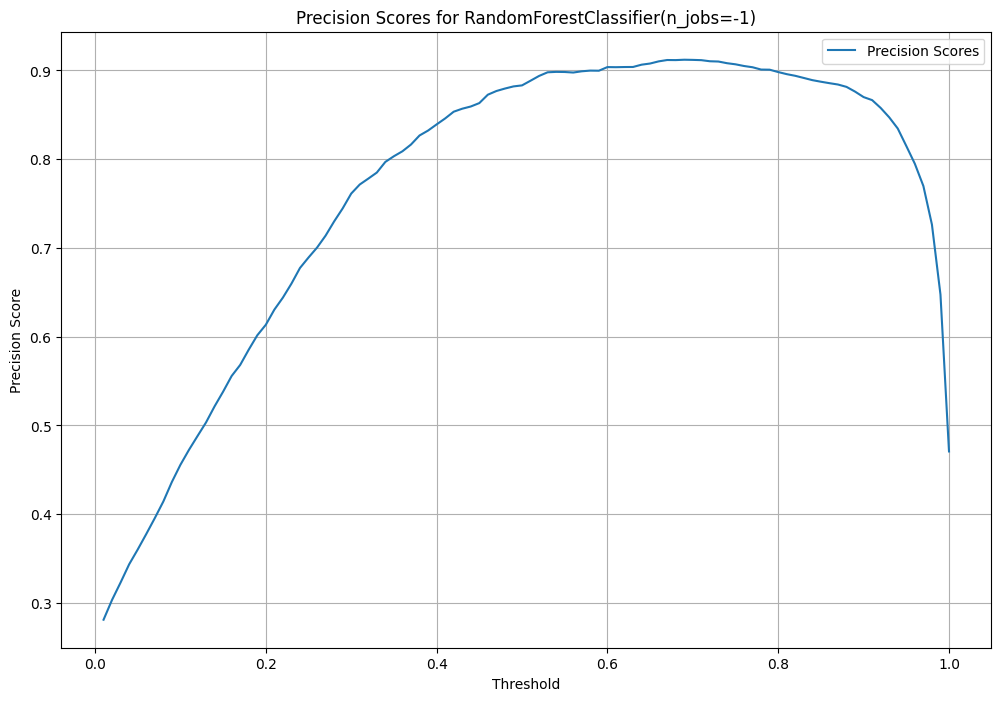

In [18]:
logreg_threshold = tune_threshold(logreg_estimator, X_valid, y_valid)
random_forest_threshold = tune_threshold(random_forest_estimator, X_valid, y_valid)

In [11]:
threshold_list = [logreg_threshold, random_forest_threshold]

In [12]:
best_threshold = get_best_threshold(threshold_list, "../models/best_threshold.json")

In [13]:
best_threshold

{'model': 'RandomForestClassifier',
 'highest_score': 0.9120631341600902,
 'threshold': 0.69,
 'metric': 'precision'}

In [14]:
evaluate_best_model(logreg_estimator, best_threshold, X_test, y_test)

 Threshold :  {'model': 'RandomForestClassifier', 'highest_score': 0.9120631341600902, 'threshold': 0.69, 'metric': 'precision'}
              precision    recall  f1-score   support

           0       0.87      0.94      0.90       998
           1       0.73      0.55      0.63       306

    accuracy                           0.85      1304
   macro avg       0.80      0.74      0.77      1304
weighted avg       0.84      0.85      0.84      1304

